# **SMS Spam Collection Data Set**

 ## **Data Set Description :**

**Source:**

Tiago A. Almeida (talmeida ufscar.br)

Department of Computer Science

Federal University of Sao Carlos (UFSCar)

Sorocaba, Sao Paulo - Brazil

**Data Set Information:**
This corpus has been collected from free or free for research sources at the Internet:
* A collection of 425 SMS spam messages was manually extracted from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages. The Grumbletext Web site.
*  A subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available.
* A list of 450 SMS ham messages collected from Caroline Tag's PhD Thesis available.
* Finally, we have incorporated the SMS Spam Corpus v.0.1 Big. It has 1,002 SMS ham messages and 322 spam messages and it is public available.

**Attribute Information:**

The collection is composed by just one text file, where each line has the correct class followed by the raw message. We offer some examples bellow:

* **ham :**   What you doing?how are you?
* **ham :** Ok lar... Joking wif u oni...
* **spam :** FreeMsg: Txt: CALL to No: 86888 & claim your reward of 3 hours talk time to use from your phone now! ubscribe6GBP/ mnth inc 3hrs 16 stop?txtStop
* **spam :** Sunshine Quiz! Win a super Sony DVD recorder if you canname the capital of Australia? Text MQUIZ to 82277. 
* **spam :** URGENT! Your Mobile No 07808726822 was awarded a L2,000 Bonus Caller Prize on 02/09/03! This is our 2nd attempt to contact YOU! Call 0871-872-9758 BOX95QU

## Importing The Required Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data file :

In [3]:
df=pd.read_csv("SMSSpamCollection",sep='\t',names=['target','message'])
df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## EDA (Exploratory Data Analysis) 

In [4]:
df.columns

Index(['target', 'message'], dtype='object')

In [5]:
df.shape

(5572, 2)

**OBSERVATION :** 
* No. of rows in dataset : 5572
* No. of columns in dataset : 2

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   target   5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


**OBSERVATION :** Both features are categorical.

In [7]:
df.describe()

,target,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


**OBSERVATION :** 
* Target column have 2 unique values and **ham** occurs mots of times.
* message column have 5169 unique values.

In [8]:
df.groupby('target').describe()

message                                                               
         count unique                                                top freq
target                                                                       
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [9]:
df['target'].value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: target, dtype: float64

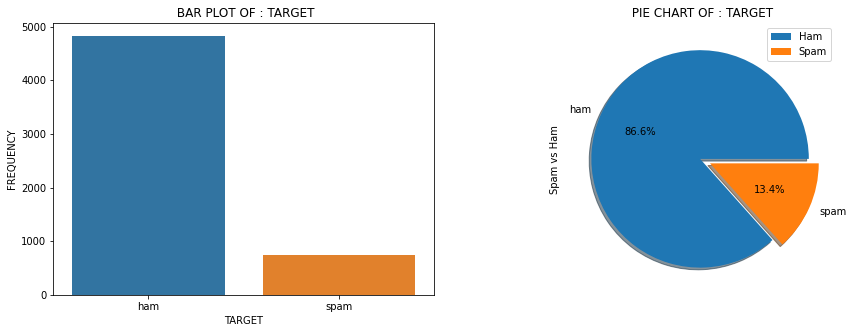

In [10]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
sns.countplot(x="target", data=df)
plt.xlabel("TARGET")
plt.ylabel("FREQUENCY")
plt.title(" BAR PLOT OF : TARGET")


plt.subplot(1,2,2)
plt.title(" PIE CHART OF : TARGET")
df["target"].value_counts().plot(kind = 'pie', explode = [0, 0.1], autopct = '%1.1f%%', shadow = True)
plt.ylabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])


plt.show()

**OBSERVATION :**
* Tagret column have 2 unique vaules (ham and spam).
* There are **4825 (86.6%)** of ham messages.
* There are **747 (13.4%)** of spam messages.

In [11]:
# Calculating the length of each message

df['length'] = df['message'].apply(len)
df.head()

,target,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


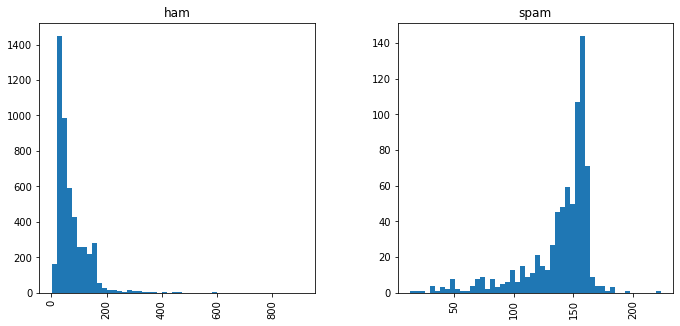

In [12]:
df.hist(column='length',by='target', bins=50,figsize=(11,5))
plt.show()

**OBSERVATION :** 
* Looks like spam messages are generally longer than ham messages:
* Bulk of ham has length below 100, for spam it is above 100.
* We will check if this feature is useful for the classification task.

## Importing some more libraries and downoads (stopwords and wordnet)

In [13]:
from wordcloud import WordCloud, STOPWORDS
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Cleaned Function : 
* It is use to clean the messages.
* It change all data into lower case.
* It removes all stopwords like (the,we,are,it,if......)
* It removes all word like(https,www.)
* It removes all special characters and digits.
* It removes all words which have length less than 2.


In [14]:
def cleaned(df_sms):

# Join all messages to make one paragraph. 
  words_ = ' '.join(df_sms['message'])
  
# change all data into lower case.
  word_=words_.lower()

#  removes all word like(https,www.)
  c_word = " ".join([word for word in word_.split()
                            if 'http' not in word
                         and 'www.' not in word
                            ])
  
# removes all special characters and digits.
  word_sms=''
  letters_only_sms = re.sub("[^a-zA-Z]", " ",c_word)
 
# removes all stopwords like (the,we,are,it,if......)
  words = letters_only_sms.split()
  words = [w for w in words if not w in stopwords.words("english")]
  
# removes all words which have length less than 2.
  for a in words:
    if len(a)<3:
      words.remove(a)

# again make all words into paragraph.
  for i in words:
    word_sms=word_sms+" "+i

# return that paragraph.
  return word_sms

### Treating "SPAM" messages

In [15]:
# Copying all spam message into df_spam

df_spam = df.loc[df['target']=='spam', :]
df_spam.head()

,target,message,length
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147
8,spam,WINNER!! As a valued network customer you have...,157
9,spam,Had your mobile 11 months or more? U R entitle...,154
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136


In [16]:
# Calling of function cleaned and pass df_spam.

cleaned_spam = cleaned(df_spam)
cleaned_spam[:2000]

' free entry wkly comp win cup final tkts may text receive entry question std txt rate apply freemsg hey darling week word back like fun still xxx std chgs send rcv winner valued network customer selected receivea prize reward claim call claim code valid hours mobile months entitled update latest colour mobiles camera free call mobile update free six chances win cash pounds txt csh send cost day days tsandcs apply reply info urgent week free membership prize jackpot txt word claim lccltd pobox ldnw xxxmobilemovieclub use credit click wap link next txt message click xxxmobilemovieclub com qjkgighjjgcbl england macedonia dont miss goals team news txt national team england try wales scotland txt poboxox wq thanks subscription ringtone mobile charged month please confirm replying yes reply charged rodger burns msg tried call reply sms free nokia mobile free camcorder please call delivery tomorrow sms sptv new jersey devils detroit red wings play ice hockey correct incorrect end reply end s

In [17]:
# Wordcloud of spam

wordcloud_spam = WordCloud(
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_spam)

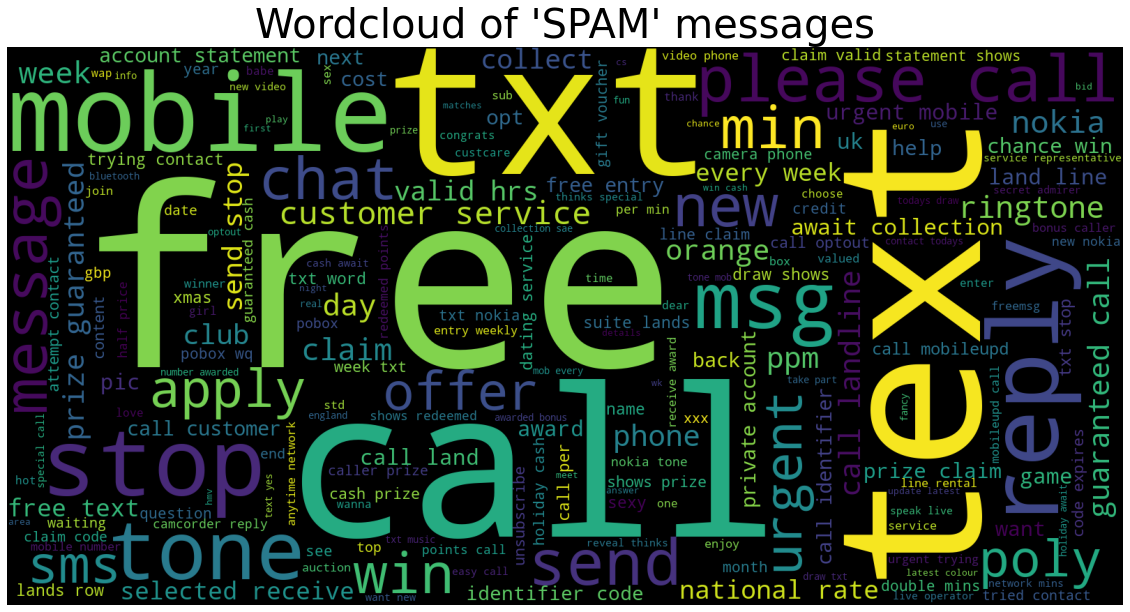

In [18]:
plt.figure(1,figsize=(20,30))
plt.title("Wordcloud of 'SPAM' messages",fontsize=40)
plt.imshow(wordcloud_spam)
plt.axis('off')
plt.show()

### Treating "HAM" messages

In [19]:
# Copying all spam message into df_spam

df_ham = df.loc[df['target']=='ham', :]
df_ham.head()

,target,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
6,ham,Even my brother is not like to speak with me. ...,77


In [20]:
# Calling of function cleaned and pass df_ham.

cleaned_ham = cleaned(df_ham)
cleaned_ham[:2000]

' jurong point crazy available bugis great world buffet cine got amore wat lar joking wif oni dun say early hor already say nah think goes usf lives around though even brother like speak treat like aids patent per request melle melle oru minnaminunginte nurungu vettam set callertune callers press copy friends callertune gonna home soon want talk stuff anymore tonight cried enough today searching right words thank breather promise wont take help granted fulfil promise wonderful blessing times date sunday watching remember spell name yes naughty make wet fine way feel way gota seriously spell name going try months joking pay first lar stock comin aft finish lunch str lor ard smth lor finish lunch already ffffffffff alright way meet sooner forced eat slice really hungry tho sucks mark getting worried knows sick turn pizza lol lol always convincing catch bus frying egg make tea eating mom left dinner feel love back amp packing car let know room ahhh work vaguely remember feel like lol wait

In [21]:
# wordcloud of ham

wordcloud_ham = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_ham)

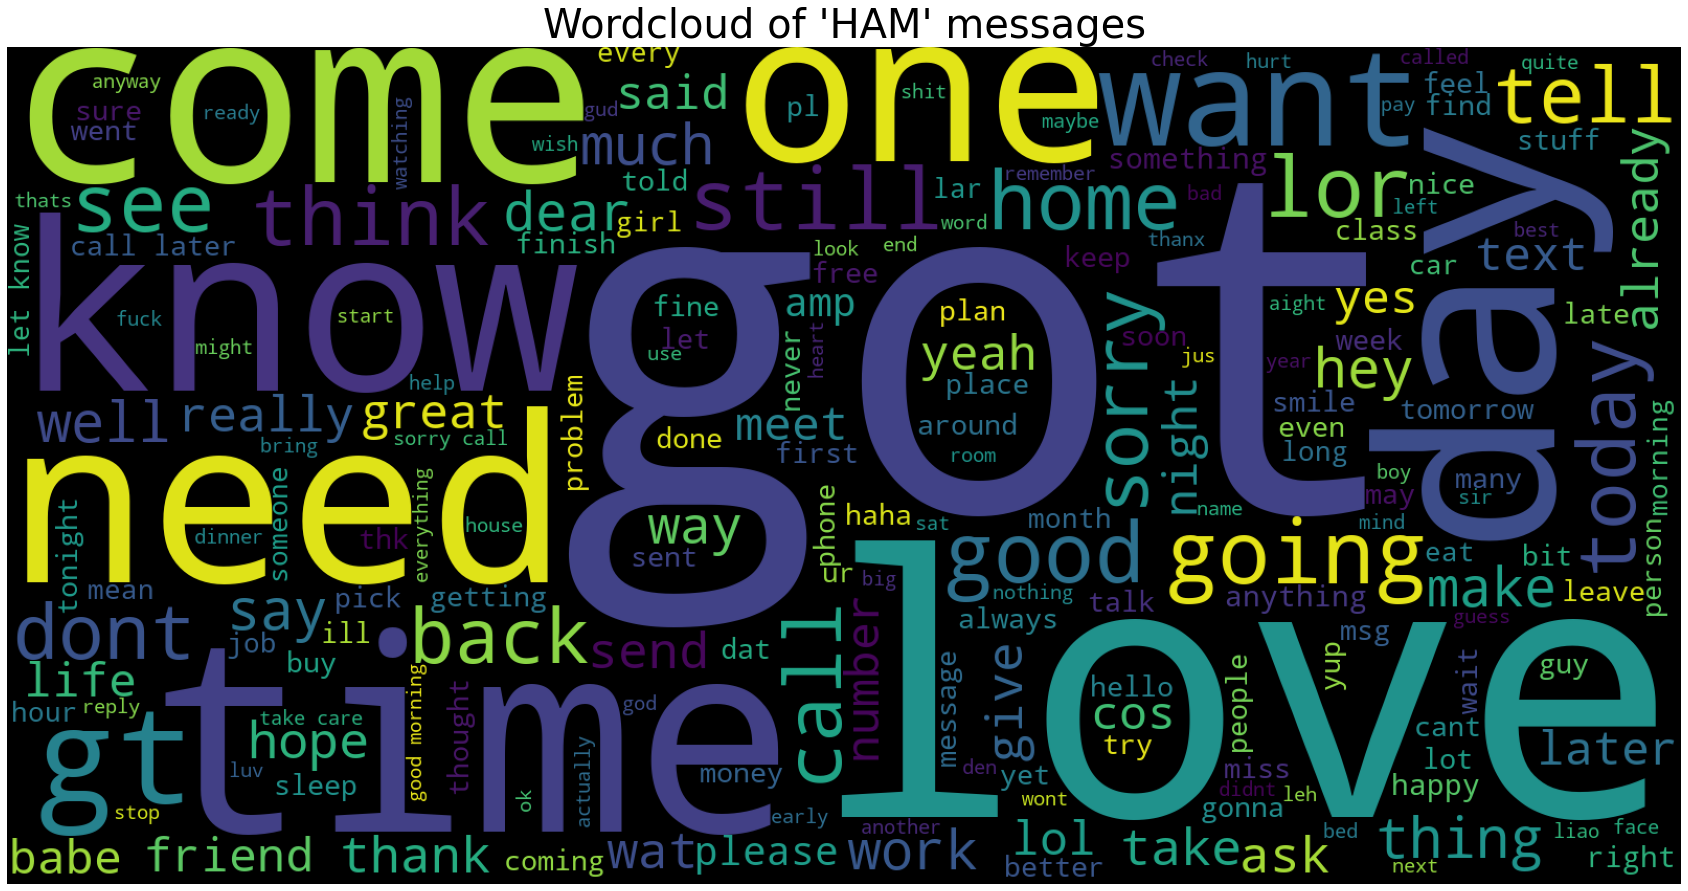

In [22]:
plt.figure(1,figsize=(30,20))
plt.title("Wordcloud of 'HAM' messages",fontsize=40)
plt.imshow(wordcloud_ham)
plt.axis('off')
plt.show()

## Data Preprocessing :

In [23]:
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [24]:
# initialise the inbuilt Stemmer
stemmer = PorterStemmer()

In [25]:
# initializse the inbuilt Lemmatizer 
lemmatizer = WordNetLemmatizer()

In [26]:
# initializing the lists
clean_mgs_lst = []
msg_len_lst = []

### Preprocessing function:
* Removing special characters
* Convert sentence into lower case
* Remove Stop Words
* Stemming or Lemmatization

In [27]:
def preprocess(raw_msg, flag):

    # Removing words like (http,www.)
    cleaned = " ".join([word for word in raw_msg.split()
                            if 'http' not in word
                          and 'www.' not in word
                            ])

    # Removing special characters and digits
    letters_only = re.sub("[^a-zA-Z]", " ",cleaned)

    # change sentence to lower case
    letters_only = letters_only.lower()

    # tokenize into words
    words = letters_only.split()
    
    # remove stop words                
    words = [w for w in words if not w  in stopwords.words("english")]

    # Stemming/Lemmatization
    if(flag == 'stem'):
        words = [stemmer.stem(word) for word in words]
    else:
        words = [lemmatizer.lemmatize(word) for word in words]
    
    clean_msg_lst.append(" ".join(words))
    
    msg_len_lst.append(len(words))

### Stemming & Lemmatization :

In [28]:
# Stemmatize the data :

clean_msg_lst = []
msg_len_lst = []

df['message'].apply(lambda x: preprocess(x, 'stem'))
df['clean_msg_stem'] = clean_msg_lst
df['msg_len_stem'] = msg_len_lst

In [29]:
# Lemmatize the data :

clean_msg_lst = []
msg_len_lst = []

df['message'].apply(lambda x: preprocess(x, 'lemma'))
df['clean_msg_lemma'] = clean_msg_lst
df['msg_len_lemma'] = msg_len_lst

In [30]:
df.head()

,target,message,length,clean_msg_stem,msg_len_stem,clean_msg_lemma,msg_len_lemma
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...,16,go jurong point crazy available bugis n great ...,16
1,ham,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni,6,ok lar joking wif u oni,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri wkli comp win fa cup final tkt st m...,21,free entry wkly comp win fa cup final tkts st ...,21
3,ham,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say,9,u dun say early hor u c already say,9
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though,7,nah think go usf life around though,7


**OBSERVATION :** After Stemming & Lemmatization 
* we can see that in stemming column some words are not understandable like (crazi,alredi,wkli,earli,.....)
* But in lemmatization column all words are understandable like (crazy,already,wkly,early,.....)

## Changing Target column's vaules into numerical values (msg_label)
* ham : 1
* spam : 0

In [31]:
df['msg_label']=df['target'].apply(lambda x: 0 if x=='spam' else 1)

df.head()

,target,message,length,clean_msg_stem,msg_len_stem,clean_msg_lemma,msg_len_lemma,msg_label
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...,16,go jurong point crazy available bugis n great ...,16,1
1,ham,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni,6,ok lar joking wif u oni,6,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri wkli comp win fa cup final tkt st m...,21,free entry wkly comp win fa cup final tkts st ...,21,0
3,ham,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say,9,u dun say early hor u c already say,9,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though,7,nah think go usf life around though,7,1


## Data Preparation

### Split dataset into train and test with 70% and 30% respetively.

In [32]:
from sklearn.model_selection  import train_test_split

train, test = train_test_split(df,test_size=0.25,random_state=100)

In [33]:
# Taking the stematized data for further predictions :

train_clean_msg=[]
for msg in train['clean_msg_stem']:
    train_clean_msg.append(msg)

test_clean_msg=[]
for msg in test['clean_msg_stem']:
    test_clean_msg.append(msg)

## Bag Of Words (BOW) :

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = "word")

train_features = vectorizer.fit_transform(train_clean_msg)

test_features = vectorizer.transform(test_clean_msg)

In [35]:
vectorizer.vocabulary_

{'would': 5282,
 'ip': 2305,
 'address': 55,
 'test': 4649,
 'consid': 939,
 'comput': 915,
 'minecraft': 2892,
 'server': 4074,
 'ee': 1365,
 'msg': 2992,
 'na': 3042,
 'poortiyagi': 3530,
 'odalebeku': 3224,
 'hanumanji': 1999,
 'name': 3051,
 'hanuman': 1998,
 'bajarangabali': 362,
 'maruti': 2800,
 'pavanaputra': 3395,
 'sankatmochan': 3973,
 'ramaduth': 3732,
 'mahav': 2758,
 'lt': 2708,
 'gt': 1944,
 'janarig': 2353,
 'ivatt': 2332,
 'kalisidar': 2439,
 'next': 3120,
 'saturday': 3992,
 'olag': 3246,
 'ondu': 3255,
 'good': 1881,
 'news': 3118,
 'keluviri': 2458,
 'maretar': 2787,
 'ind': 2243,
 'dodda': 1246,
 'problum': 3629,
 'nalli': 3050,
 'siguviri': 4168,
 'idu': 2200,
 'matra': 2812,
 'true': 4856,
 'neglet': 3093,
 'anybodi': 199,
 'number': 3195,
 'still': 4420,
 'thought': 4713,
 'tact': 4569,
 'way': 5131,
 'ask': 275,
 'alex': 125,
 'wait': 5094,
 'til': 4742,
 'least': 2573,
 'wednesday': 5148,
 'see': 4041,
 'get': 1830,
 'sm': 4235,
 'auction': 307,
 'brand': 575,

In [36]:
print("Total unique words:", len(vectorizer.vocabulary_))
print("Type of train_features:", type(train_features))
print("Shape of input data", train_features.shape)

Total unique words: 5415
Type of train_features: <class 'scipy.sparse.csr.csr_matrix'>
Shape of input data (4179, 5415)


## Traning and Evalution of Model :

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import metrics


In [38]:
# creating objects : 

Classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    SVC()]

In [39]:
# convert train and test into array from sparse matrix.

dense_features = train_features.toarray()
dense_test = test_features.toarray()

---------------LogisticRegression---------------

Accuracy of LogisticRegression is  0.9806173725771715

Confusion Matix
[[ 162    2]
 [  25 1204]]


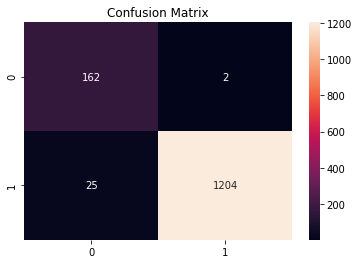


Classification Report

              precision    recall  f1-score   support

           0       0.87      0.99      0.92       164
           1       1.00      0.98      0.99      1229

    accuracy                           0.98      1393
   macro avg       0.93      0.98      0.96      1393
weighted avg       0.98      0.98      0.98      1393




---------------DecisionTreeClassifier---------------

Accuracy of DecisionTreeClassifier is  0.968413496051687

Confusion Matix
[[ 156   13]
 [  31 1193]]


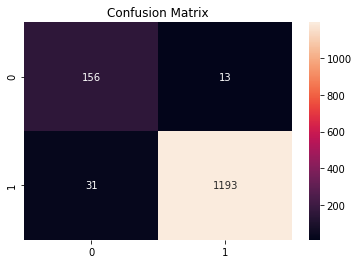


Classification Report

              precision    recall  f1-score   support

           0       0.83      0.92      0.88       169
           1       0.99      0.97      0.98      1224

    accuracy                           0.97      1393
   macro avg       0.91      0.95      0.93      1393
weighted avg       0.97      0.97      0.97      1393




---------------SVC---------------

Accuracy of SVC is  0.9763101220387652

Confusion Matix
[[ 156    2]
 [  31 1204]]


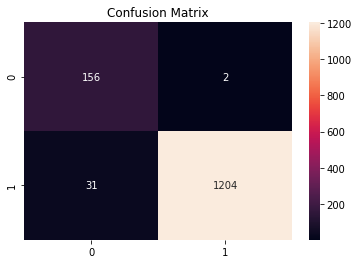


Classification Report

              precision    recall  f1-score   support

           0       0.83      0.99      0.90       158
           1       1.00      0.97      0.99      1235

    accuracy                           0.98      1393
   macro avg       0.92      0.98      0.95      1393
weighted avg       0.98      0.98      0.98      1393






In [41]:
# Using loop run algo.
d_acc={}

for classifier in (Classifiers):
    
    # traning model :
    print('---------------'+classifier.__class__.__name__+'---------------\n')
    fit = classifier.fit(dense_features,train['msg_label'])
    
    # Prediction :
    pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['msg_label'])
    d_acc[classifier.__class__.__name__]=round((accuracy*100),2)

    print('Accuracy of '+classifier.__class__.__name__+' is ',accuracy)
    
    # confusion Maritx :
    print("\nConfusion Matix")
    con_metric=metrics.confusion_matrix(pred,test['msg_label'])
    print(con_metric)
    sns.heatmap(con_metric, annot=True, fmt='d')
    plt.title("Confusion Matrix")
    plt.show()

    # classification Report
    print('\nClassification Report\n')
    print(metrics.classification_report(pred,test['msg_label']))
    print("\n\n")

In [42]:
acc_df=pd.DataFrame.from_dict(d_acc,orient='index',columns=['Accuracy'])
acc_df

,Accuracy
LogisticRegression,98.06
DecisionTreeClassifier,96.84
SVC,97.63


**OBSERVATION :** Logistic Regression have higher accuracy.

## Prediction on Future Data Points :

In [43]:
# preparing model using logistic regression :
model = LogisticRegression()
model.fit(dense_features,train['msg_label'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
# preprocess message

def preprocess_p(raw_msg):
    # Removing special characters and digits
    letters_only = re.sub("[^a-zA-Z]", " ",raw_msg)
    
    # change sentence to lower case
    letters_only = letters_only.lower()

    # tokenize into words
    words = letters_only.split()
    
    # remove stop words                
    words = [w for w in words if not w in stopwords.words("english")]
    
    # Stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    
    clean_sent = " ".join(words)
    
    return clean_sent

In [45]:
# preditction of message
def predict(sms,model,vectorizer):
    
    classifier = model
    
    # Preprocessing the sms
    clean_sms = preprocess_p(sms)
    
    # Converting text to numerical vector
    clean_sms_encoded = vectorizer.transform([clean_sms])
    
    # Converting sparse matrix to dense matrix
    sms_input = clean_sms_encoded.toarray()
    
    # Prediction
    prediction = classifier.predict(clean_sms_encoded)
    
    return prediction

In [47]:
msg = input("Enter a msg : ")
prediction = predict(msg,model,vectorizer)
if(prediction == 0):
    print("SPAM Message")
else:
    print("HAM Message")

Enter a msg : Hello how r u?
HAM Message
